## Data Visualization Final Assignmnet
## Ravi Teja Kandimalla(21237)

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
from pywaffle import Waffle
from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)
data = pd.read_csv("/home/msc2/Desktop/Subjects/datavizzz/datavizz_assignment/titanic_train.csv")
tips = load_dataset("tips")

In [98]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Pie Chart

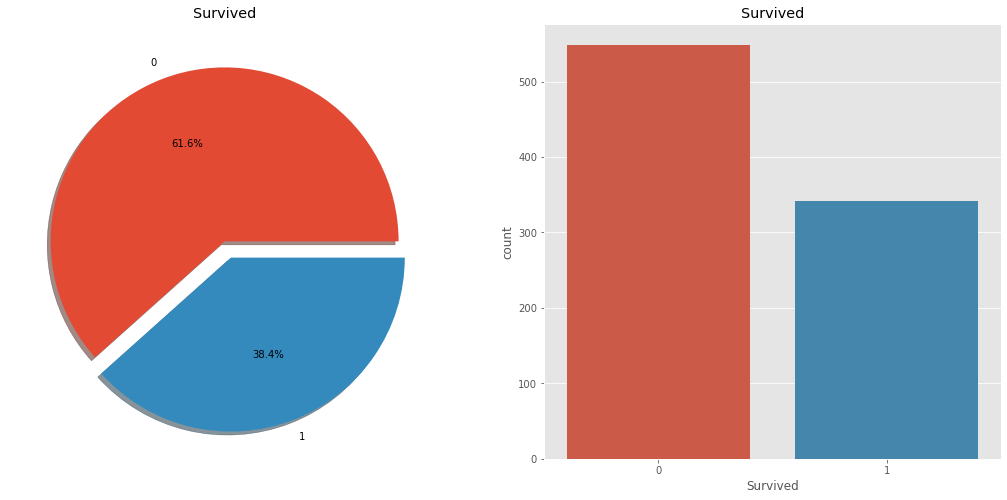

In [80]:

f,ax=plt.subplots(1,2,figsize=(18,8)) # 1 row , 2 columns subplots 
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)

ax[0].set_title('Survived') 
ax[0].set_ylabel('')

sns.countplot('Survived',data=data,ax=ax[1])

ax[1].set_title('Survived') # ax[0] & ax[1] are different axis for different plots.

plt.show()

## **why is this plot?**
## To show percentages of a whole
## Bars convey this information effectively

In [81]:
survived_men = sum(data.loc[data.Sex == 'male']["Survived"])
all_men = len(data.loc[data.Sex == 'male']["Survived"])
men_rate = survived_men / all_men
print(f"percentage of men who survived {(men_rate*100):0.2f} %")

percentage of men who survived 18.89 %


In [82]:
survived_women = sum(data.loc[data.Sex == 'female']["Survived"])
all_women = len(data.loc[data.Sex == 'female']["Survived"])
women_rate = survived_women / all_women
print(f"percentage of women who survived {(women_rate*100):0.2f} %")

percentage of women who survived 74.20 %


Text(0.5, 1.0, "Men's Survival Rate")

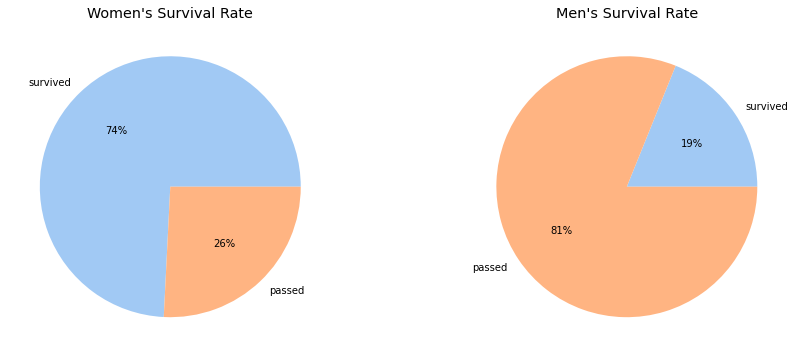

In [83]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
palette_color = sns.color_palette('pastel')
ax1.pie(x = [survived_women, (all_women - survived_women)], labels = ["survived", "passed"], colors = palette_color, autopct='%.0f%%')
ax2.pie(x = [survived_men, (all_men - survived_men)], labels = ["survived", "passed"], colors = palette_color, autopct='%.0f%%')
ax1.set_title("Women's Survival Rate")
ax2.set_title("Men's Survival Rate")

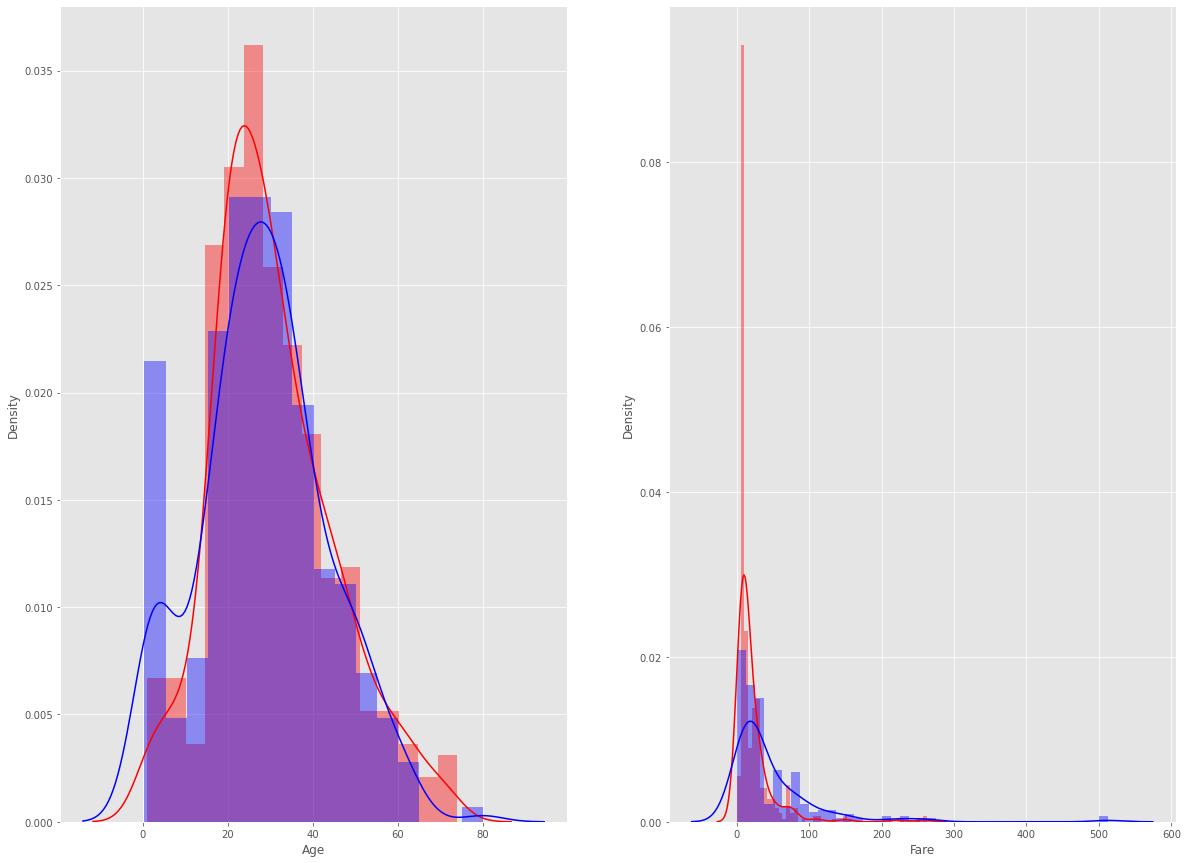

In [84]:
temp = data.select_dtypes(include = "float")
plt.figure(figsize=(20,15))
plt.style.use('ggplot')
for i, col in enumerate(temp.columns):
    plt.subplot(1,2,i+1)
    sns.distplot(data[data["Survived"]==0][col],color='red')
    sns.distplot(data[data["Survived"]==1][col],color='blue')

## **why this polt?**
## This plot display both the values and overall trend of the data and more over Bars with the line conveys this information more effectively.

<AxesSubplot:xlabel='Age_group', ylabel='count'>

<Figure size 1440x1080 with 0 Axes>

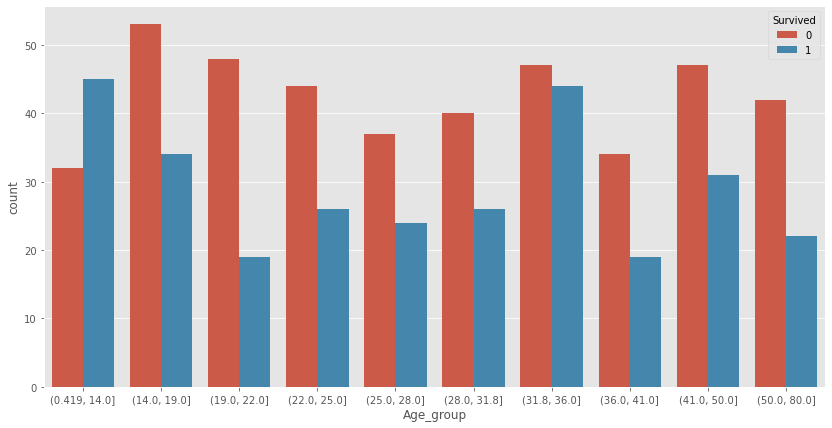

In [85]:
data['Age_group'] = pd.qcut(data['Age'], 10)
plt.figure(figsize=(20,15))
plt.figure(figsize=(14,7))
sns.countplot(x='Age_group', hue='Survived', data=data)

## Most of the times bars convey information effectively.

<Figure size 1440x1080 with 0 Axes>

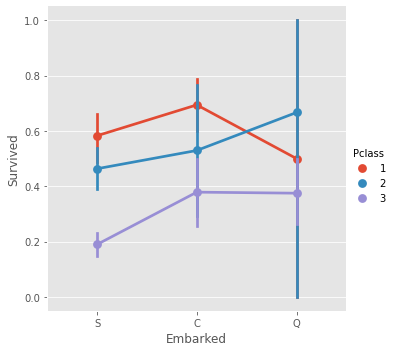

In [86]:
plt.figure(figsize=(20,15))
sns.factorplot('Embarked','Survived',hue='Pclass',data=data)
plt.show()

# Doughnut

<Figure size 1440x576 with 0 Axes>

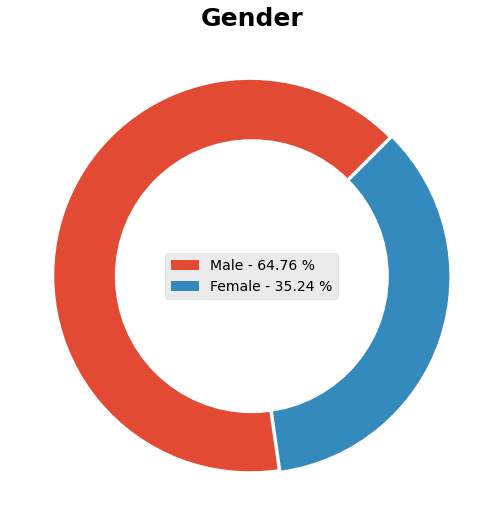

In [87]:
values = data["Sex"].value_counts()
keys = ["Male", "Female"]
total_records = data["Sex"].count()
plt.figure(figsize = (20,8))
labels = ["{0} - {1:1.2f} %".format(i, j/total_records * 100) for i, j in zip(keys, values)]
explodes = [0.02/len(keys) for i in range(len(keys))]

plt.subplots(figsize = (16, 9))
# draw the pie chart
patches, texts = plt.pie(values, startangle = 45, explode = explodes, colors = None)

# draw circle
center_circle = plt.Circle(xy = (0, 0), radius = 0.70, fc = "white")
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title("Gender", fontsize = 25, fontweight = "bold")
plt.legend(patches, labels, loc="center", fontsize = 14)
plt.show()

## **Why this graph?**
## Doughnut chart is the go to when it comes to part to whole comparision

  port  Total
0    S    644
1    C    168
2    Q     77


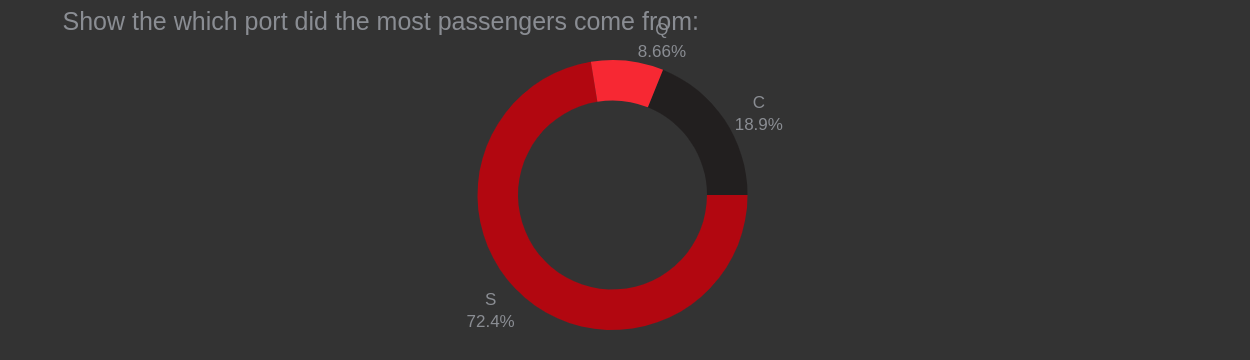

<Figure size 1080x576 with 0 Axes>

In [126]:
#Lets see the which port did the most passengers come from
plt.figure(figsize=(15,8))
ps=pd.DataFrame(data.Embarked.value_counts().reset_index().rename(columns={"index":"port","Embarked":"Total"}))
print(ps)
fig= px.pie(ps, names='port',values="Total", height=300, width=600, hole=0.7,
title='Show the which port did the most passengers come from:',
color_discrete_sequence=['#b20710', '#221f1f'])
fig.update_traces(hovertemplate=None, textposition='outside',
textinfo='percent+label', rotation=90)
fig.update_layout(margin=dict(t=60, b=30, l=0, r=0), showlegend=False,
plot_bgcolor='#333', paper_bgcolor='#333',
title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
font=dict(size=17, color='#8a8d93'),
hoverlabel=dict(bgcolor="#444", font_size=13,
font_family="Lato, sans-serif"))

## Proportions and Closure

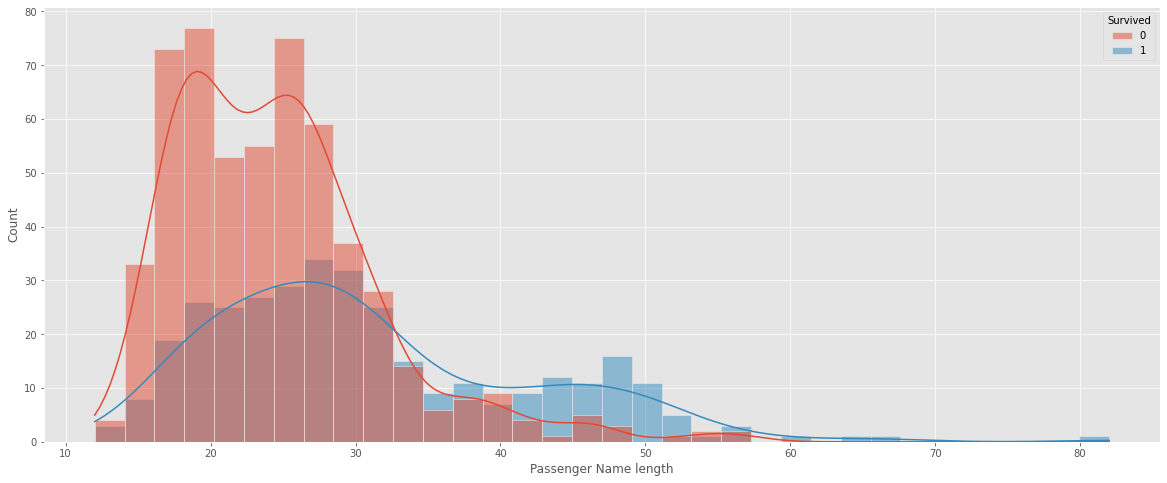

In [88]:
data["Name_len"] = data["Name"].apply(len)
plt.figure(figsize=(20, 8))
sns.histplot(data=data, x="Name_len", hue="Survived", kde="True")
plt.xlabel("Passenger Name length")
plt.ylabel("Count")
plt.show()

## **why this polt?**
## This plot display both the values and overall trend of the data and more over Bars with the line conveys this information more effectively.

<Figure size 1440x576 with 0 Axes>

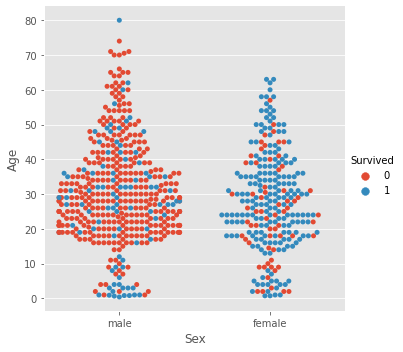

In [89]:
plt.figure(figsize=(20, 8))
sns.catplot(x='Sex', y='Age', data = data, hue='Survived',kind = 'swarm')

## **why this plot?**
## Strip plot is best technique for summarizing a univariate data set.

# Boxplot

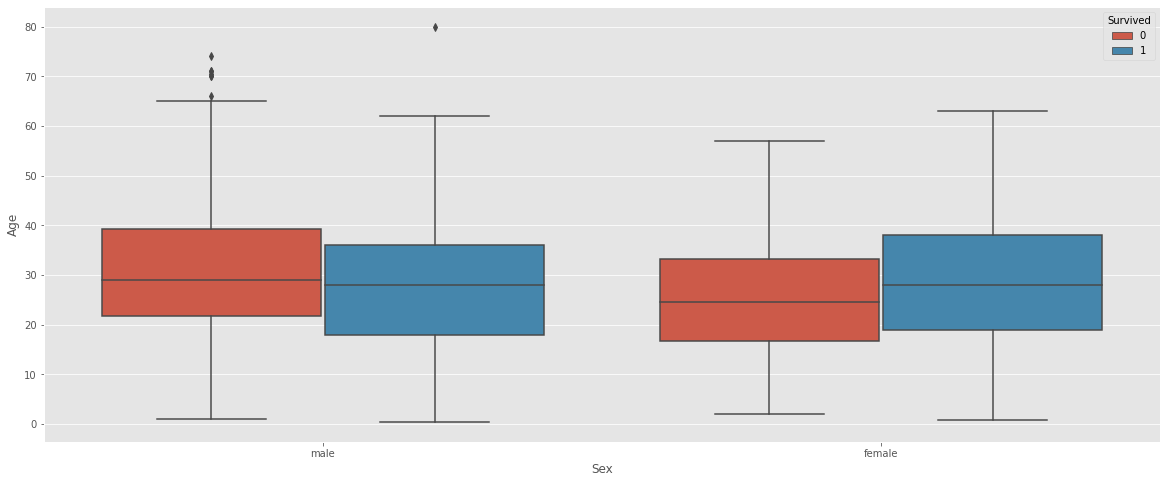

In [125]:
plt.figure(figsize = (20,8))
sns.boxplot(data['Sex'], data["Age"], data["Survived"])
plt.show()

## **why this plot?**
## provide a visual summary of the data enabling readers to quickly identify mean values, the dispersion of the data set, and signs of skewness.

# Candlestick

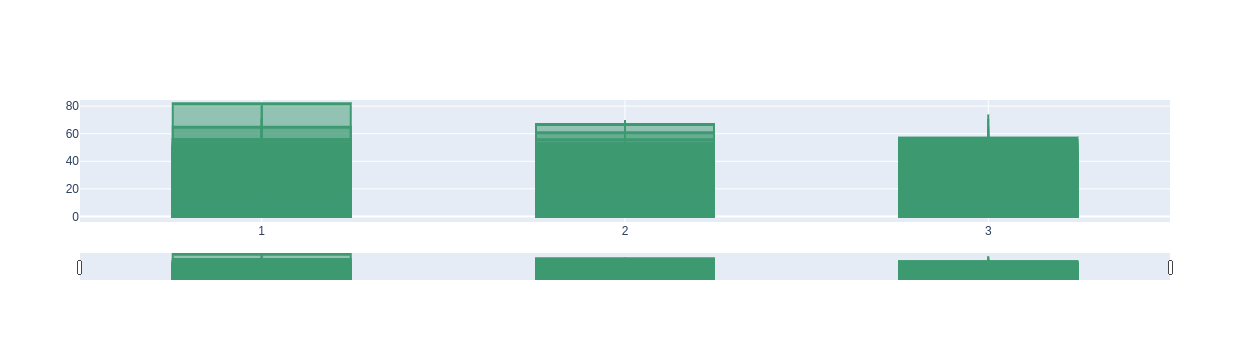

In [90]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=data['Pclass'],
                open=data['Survived'],
                high=data['Age'],
                low=data['Pclass'],
                close=data['Name_len'])])

fig.show()

## **why this plot?**
## To determine possible data movement based on past patterns

<Figure size 1440x576 with 0 Axes>

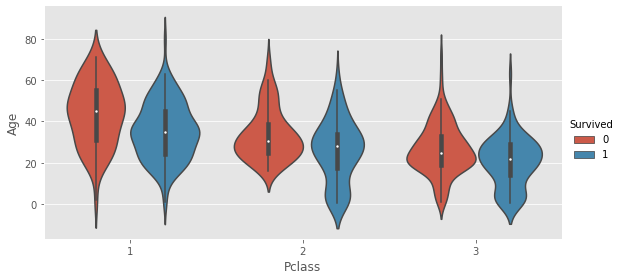

In [91]:
plt.figure(figsize = (20,8))
sns.catplot(x="Pclass", y="Age",hue="Survived",data=data,kind="violin", height=4, aspect=2)

### shows us Elder people have low survival

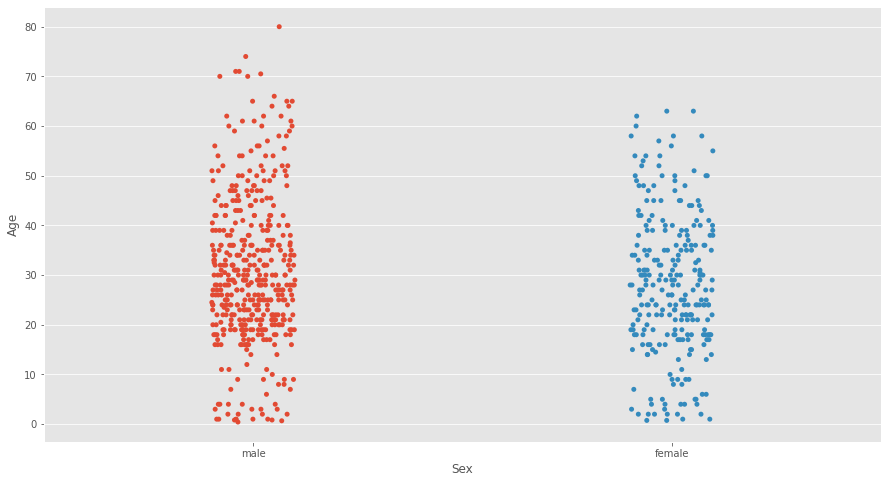

In [92]:
plt.figure(figsize=(15,8))
sns.stripplot(x=data["Sex"], y=data["Age"], data=data)
plt.show()

## **why thi splot?**
## ths strip plot is used to visualise the distribution of many individual one-dimensional values.

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

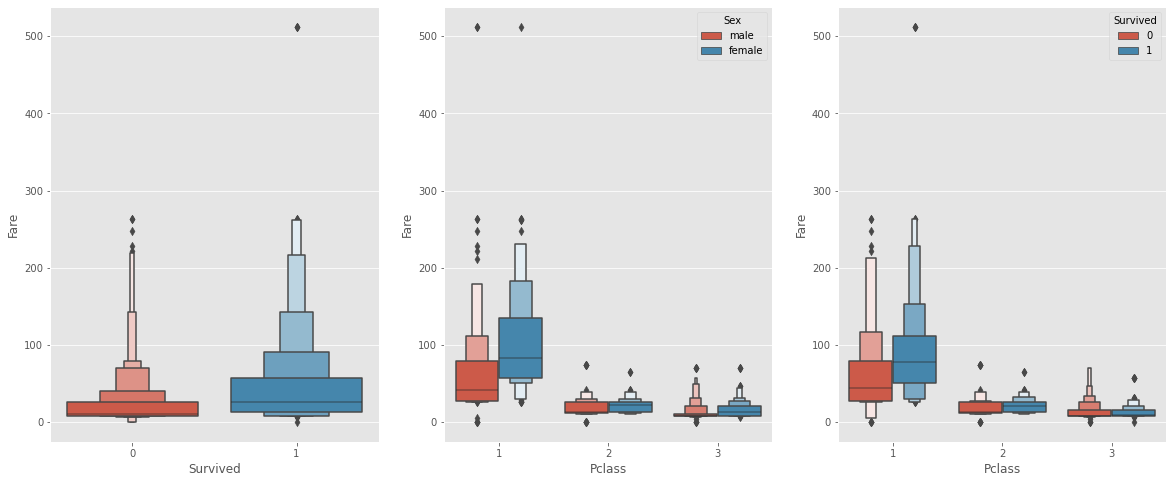

In [93]:
f,ax = plt.subplots(1,3, figsize=(20,8))
sns.boxenplot(data=data, y='Fare', x='Survived', ax=ax[0])
sns.boxenplot(data=data, y='Fare', x='Pclass',hue= 'Sex', ax=ax[1])
sns.boxenplot(data=data, y='Fare', x='Pclass',hue= 'Survived', ax=ax[2])

## **why this plot?**
## Boxenplot are a great way to summarize the distribution of a dataset. 

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

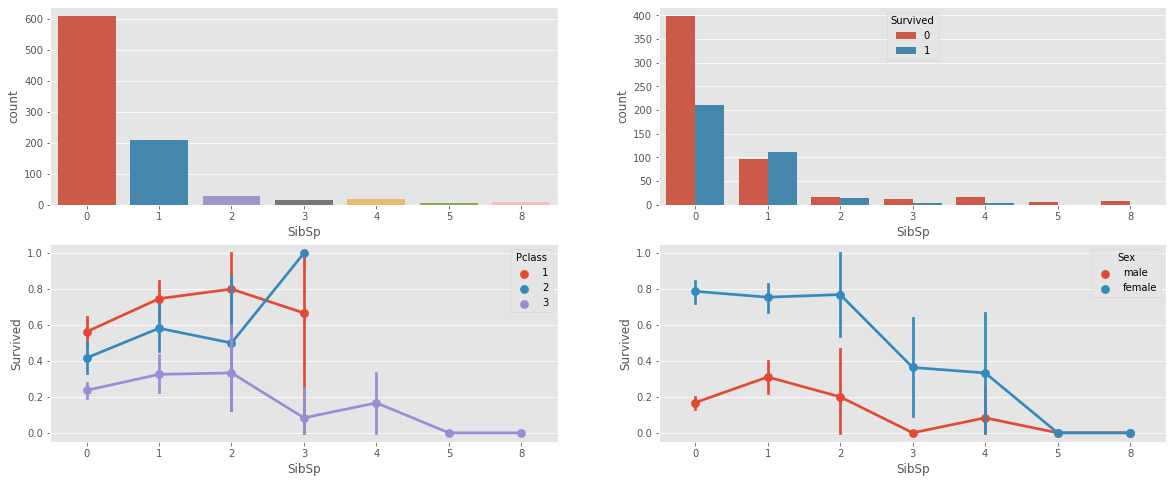

In [94]:
f,ax = plt.subplots(2,2,figsize=(20,8))
sns.countplot(x = 'SibSp', data=data, ax=ax[0][0])
sns.countplot(x = 'SibSp', hue='Survived', data=data, ax=ax[0][1])
sns.pointplot(x = 'SibSp',y= 'Survived', hue='Pclass', data=data, ax=ax[1][0])
sns.pointplot(x = 'SibSp',y= 'Survived', hue='Sex', data=data, ax=ax[1][1])

## **why this plot?**
### For the Comparision of multiple values between two groups.

## Histogram

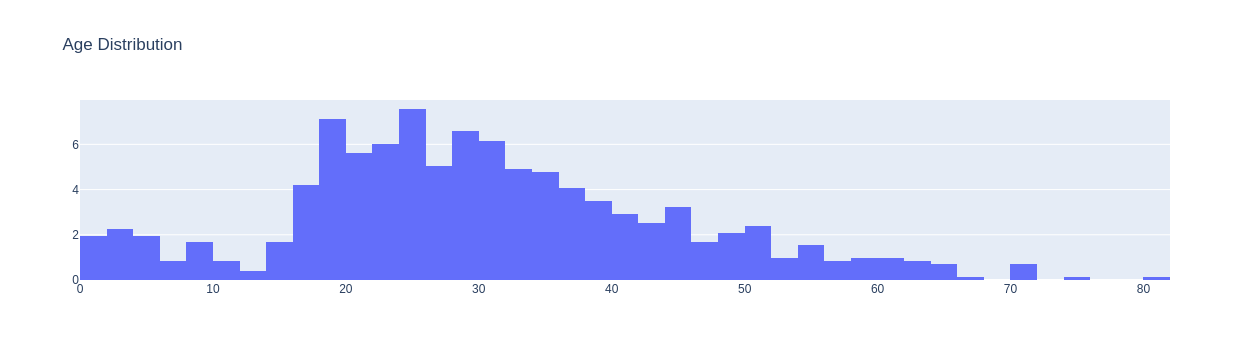

In [95]:
trace = go.Histogram(x=data['Age'],nbinsx=40,histnorm='percent')
data = [trace]
# defining layout
layout = go.Layout(title="Age Distribution")
# defining figure and plotting
fig = go.Figure(data = data,layout = layout)
iplot(fig)

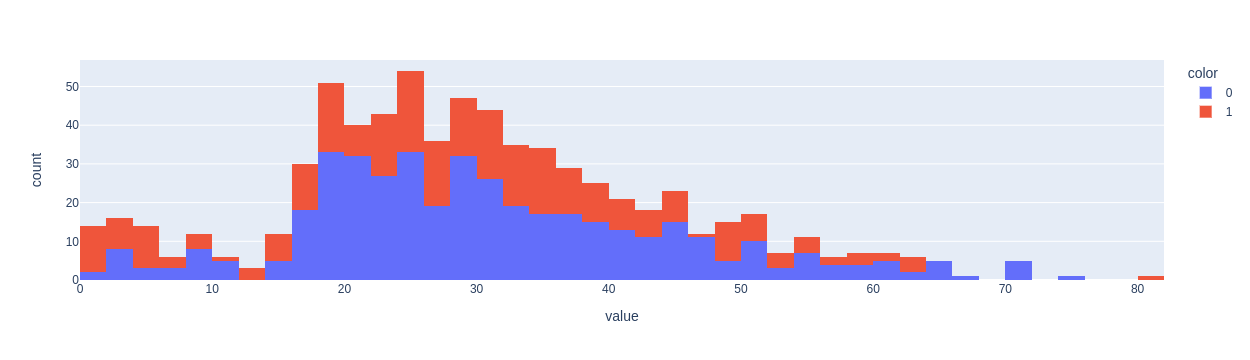

In [123]:
px.histogram(data['Age'],color=data['Survived'])

### The age distribution for survivors and deceased is actually very similar. One notable difference is that, of the survivors, a larger proportion were children. 

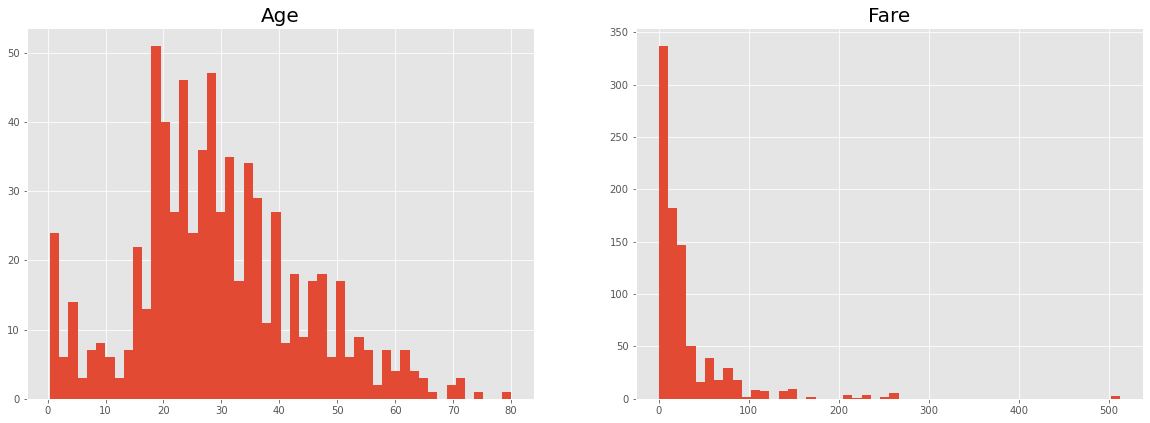

In [99]:
plt.figure(figsize=(20,15))
n_plt, m_plt = 2, 2
for num_plt, col_name in ((1, 'Age'), (2, 'Fare')):
    plt.subplot(n_plt, m_plt, num_plt)
    data[col_name].hist(bins = 50)
    plt.title(col_name, fontsize=20)

# Distplot

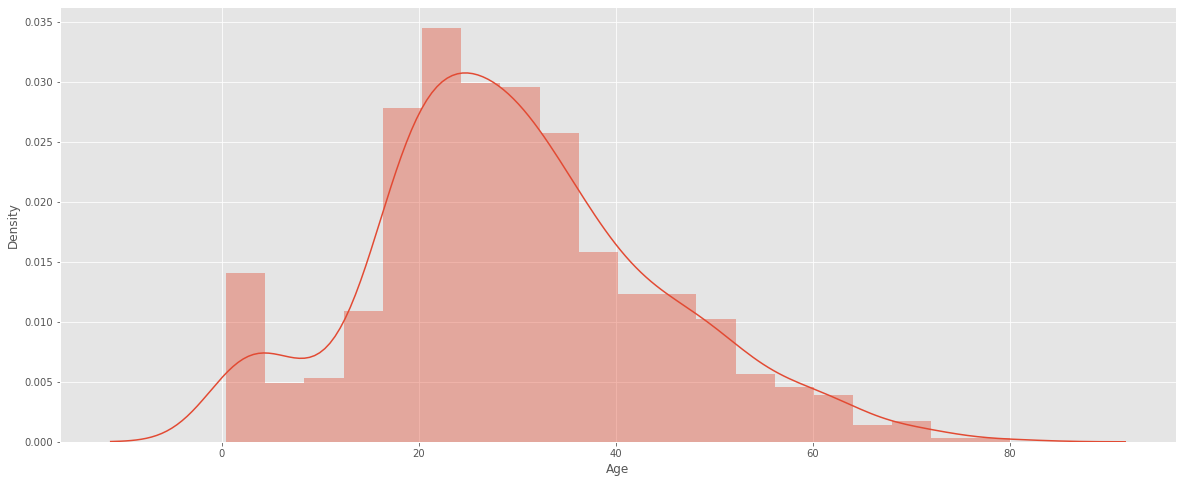

In [100]:
plt.figure(figsize = (20,8))
sns.distplot(data['Age']) 
plt.show()

# Scatter Plot

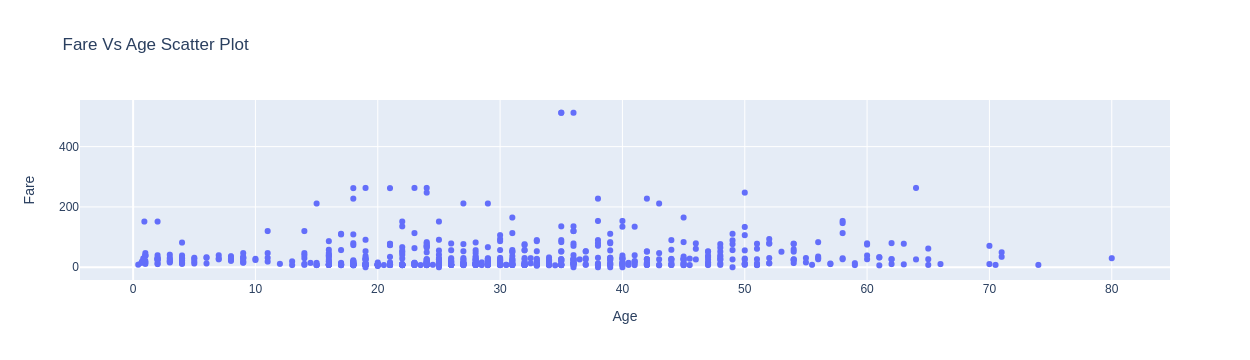

<Figure size 1440x576 with 0 Axes>

In [101]:
plt.figure(figsize = (20,8))
trace = go.Scatter(x = data.Age,y=data['Fare'],text = data['Survived'],mode='markers')
data1 =[trace]
#defining layout
layout = go.Layout(title='Fare Vs Age Scatter Plot',xaxis=dict(title='Age'),yaxis=dict(title='Fare'),hovermode='closest')
#defining figure and plotting
figure = go.Figure(data=data1,layout=layout)
iplot(figure)


## **why this plot?**
## It gives the idea of correlation between features...

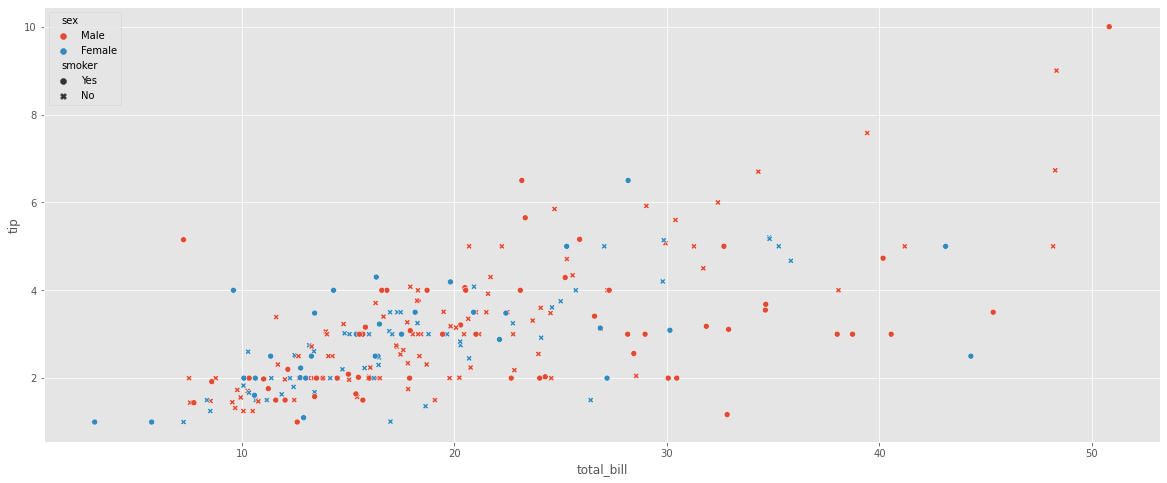

In [103]:
plt.figure(figsize = (20,8))
sns.scatterplot(tips["total_bill"], tips["tip"], hue=tips["sex"], style=tips['smoker'])
plt.show()

## Bar Plot

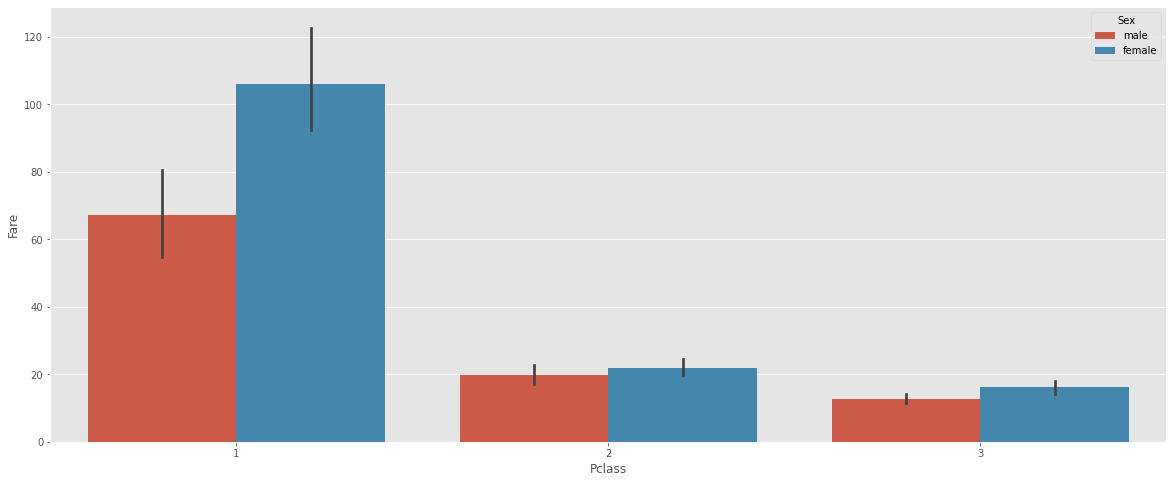

In [105]:
plt.figure(figsize = (20,8))
sns.barplot(data['Pclass'], data['Fare'], hue = data["Sex"])
plt.show()

## Distplot

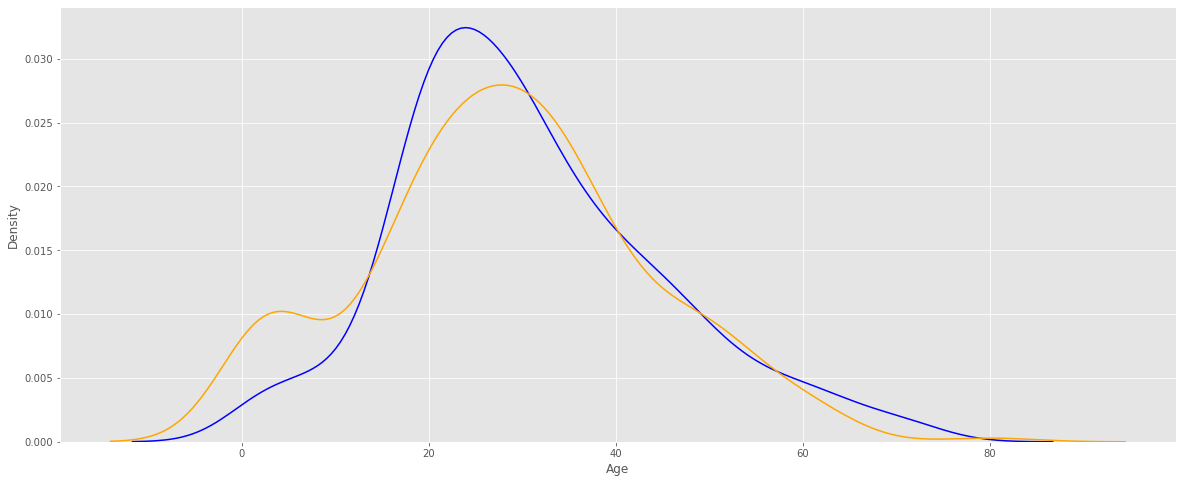

In [108]:
plt.figure(figsize = (20,8))
sns.distplot(data[data['Survived'] == 0]['Age'], hist=False, color="blue") 
sns.distplot(data[data['Survived'] == 1]['Age'], hist=False, color="orange")
plt.show()

## **why is this plot for?**
## shows general distributional features of dataset variables

In [113]:
# plt.figure(figsize = (20,8))
from numpy import random
from sklearn.model_selection import train_test_split
trn_df,val_df = train_test_split(data, test_size=0.25)

### Fare have no significant impact to survival rate

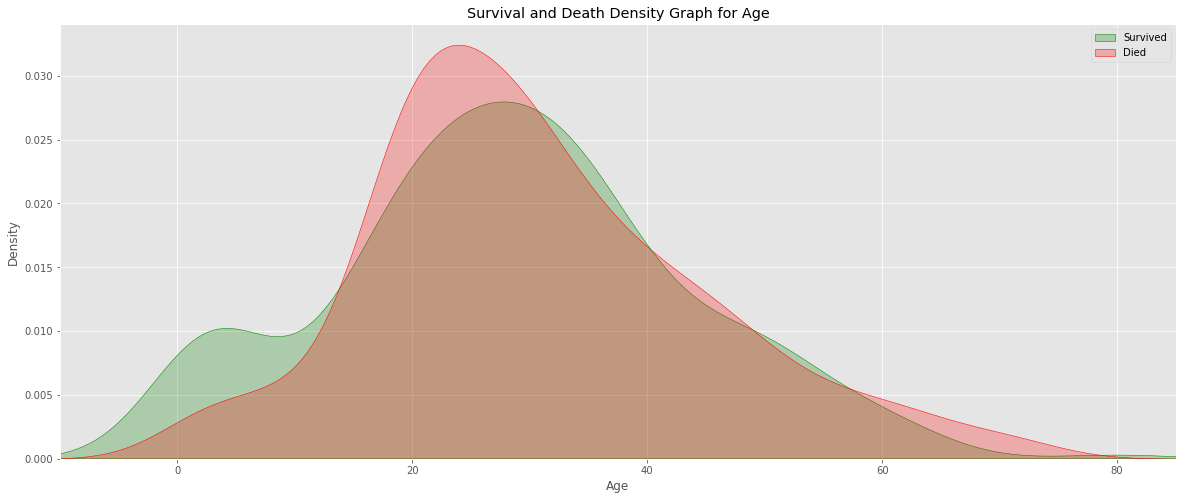

In [117]:
plt.figure(figsize = (20,8))
ax = sns.kdeplot(data["Age"][data.Survived == 1], color="green", shade=True)
sns.kdeplot(data["Age"][data.Survived == 0], color="red", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Survival and Death Density Graph for Age')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

## **WHY IS THIS PLOT**
## Because distribution of the data cannot be conveyed through Table.

## Catplot

<Figure size 1440x576 with 0 Axes>

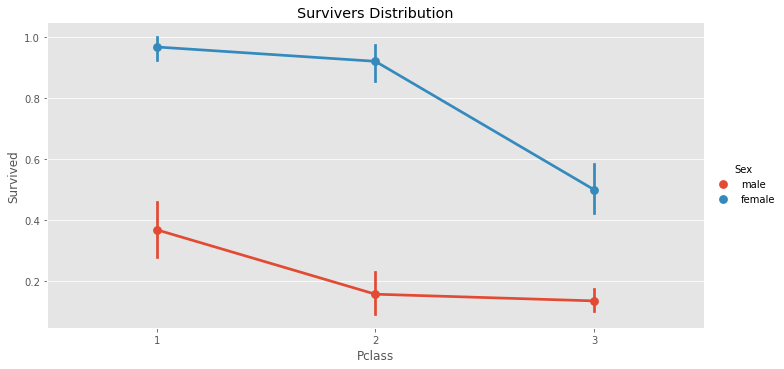

In [118]:
plt.figure(figsize = (20,8))
sns.catplot(x='Pclass', y='Survived', hue='Sex', aspect=2, data=data, kind='point')
plt.title('Survivers Distribution')
plt.show()

## **why this plot?**

### For the Comparision of multiple values between two groups.

<AxesSubplot:xlabel='Age', ylabel='Density'>

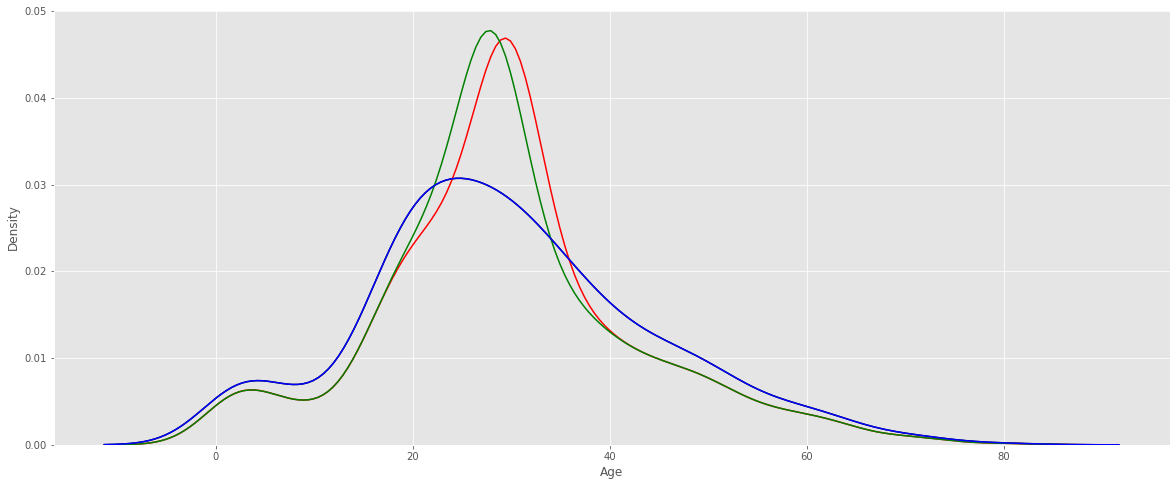

In [121]:
# Check the best strategy to use to fill null values
plt.figure(figsize=(20, 8))
sns.kdeplot(data["Age"], color="black")
sns.kdeplot(data["Age"].fillna(data["Age"].mean()), color="red")
sns.kdeplot(data["Age"].fillna(data["Age"].median()), color="green")
sns.kdeplot(data["Age"].fillna(data["Age"].mode()), color="blue")

### Looks like that the best strategy to fill null values is to use mode of the data, since the kde of mode overlaps the kde of the original data